In [1]:
'''

    선형회귀(다중회귀)
    
    1. 데이터 수집

'''

'\n\n    선형회귀(다중회귀)\n    \n    1. 데이터 수집\n\n'

In [2]:
import numpy as np
import pandas as pd

### 1. 데이터 수집

In [3]:
df = pd.read_csv(r"C:\Users\YB\Desktop\tf24_study\csv\perch_full.csv")
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [4]:
# df를 2차원 ndarray 변경
# perch_full = df.values
perch_full = df.to_numpy() #권장
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

### 2. 레이블(정답) 준비

In [5]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [6]:
len(df),len(perch_weight)

(56, 56)

### 3. 데이터 분리

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(perch_full,perch_weight,
                                                 test_size=0.2,random_state=42)

In [9]:
X_train.shape, y_test.shape

((44, 3), (12,))

In [10]:
y_train.shape, y_test.shape

((44,), (12,))

### 4. 다항회귀

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly = PolynomialFeatures(degree = 5, include_bias=False)
poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly = poly.transform(X_test)

In [13]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

### 5. 표준화

In [14]:
from sklearn.preprocessing  import StandardScaler

In [15]:
sc = StandardScaler()
sc.fit(train_poly)
train_poly_scaled = sc.transform(train_poly)
test_poly_scaled = sc.transform(test_poly)

### 6. 모델 생성 및 훈련

* Ridge(alpha = 1.0)
* alpha 값이 커지면 규제강도가 강해진다.

In [16]:
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [17]:
lr = Lasso()
lr.fit(train_poly_scaled, y_train)

Lasso()

### 7. 평가

In [18]:
'훈련 데이터 score:{}'.format(lr.score(train_poly_scaled,y_train))

'훈련 데이터 score:0.9897812228260618'

In [19]:
'테스트 데이터 score:{}'.format(lr.score(test_poly_scaled,y_test))

'테스트 데이터 score:0.9800354016844836'

### 8. MAE 회귀성능 지표

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
y_pred = lr.predict(test_poly_scaled)
mae = mean_absolute_error(y_test, y_pred)
mae

27.91647161738152

### 과적합이 발생됨 해결하자.


### 적절한 alpha 찾기
* 훈련데이터 score와 테스트 데이터 score값 시각화

In [22]:
alpha_list=[0.001, 0.01, 0.1, 1.0, 10, 100]
train_score=[]
test_score=[]

In [30]:
for alpha in alpha_list:
    lr = Lasso(alpha = alpha,max_iter=10000,tol=0.010)
    lr.fit(train_poly_scaled,y_train)
    train_score.append(lr.score(train_poly_scaled,y_train))
    test_score.append(lr.score(test_poly_scaled,y_test))

### 로그함수
* scaling 효과
* 용도: 큰 값을 작게 만든다.

In [28]:
alpha_list=[0.001, 0.01, 0.1, 1.0, 10, 100]
train_score=[]
test_score=[]

np.log10(alpha_list)#10^n 승 형태의 n을 반환

array([-3., -2., -1.,  0.,  1.,  2.])

### 시각화

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

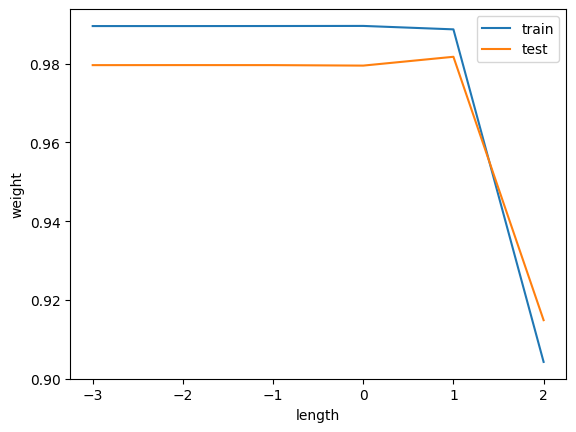

In [31]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)

plt.xlabel('length')
plt.ylabel('weight')
plt.legend(['train','test'])
plt.show()


### 가장 적합한 alpha 값은 두 그래프가 가깝고 테스트 score가 가장 높은 alpha 값이다. (-1 즉, 0.1 이다.)

### 최고의 alpha 값으로 다시 훈련하자

In [43]:
lr3 = Lasso(alpha=10)
lr3.fit(train_poly_scaled, y_train)

Lasso(alpha=10)

In [44]:
'훈련 데이터 score:{}'.format(lr3.score(train_poly_scaled,y_train))

'훈련 데이터 score:0.9887275726909216'

In [45]:
'테스트 데이터 score:{}'.format(lr3.score(test_poly_scaled,y_test))

'테스트 데이터 score:0.9825903205582611'

### Ridge 는 영향력이 없는 피쳐의 회귀계수를 0에 근접하게 만든다.

In [35]:
np.sum(lr.coef_ == 0)

40

In [36]:
len(lr.coef_)

55

### 결론은 (degree=5) 총 55개의 특성(feature)중에서 Lasso가 실제 사용한 특성은 15개가 된다.
feature는 제거된 효과이다. ==> 필터선택(feature selection)효과를 볼 수 있다.